# Sampling in Python

## Simple sampling with pandas
Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Our first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyter_datatables import init_datatables_mode

In [11]:
# Read in the spotify data 
spotify_population = pd.read_feather('spotify_2000_2020.feather')

# Display the first few rows
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [13]:
# Display the row and column count
spotify_population.shape

(41656, 20)

In [15]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
spotify_sample.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
21700,0.073000,['Britney Spears'],0.724,224400.0,3.740000,0.695,0.0,4fixebDZAVToLbUCuEloa2,0.000000,11.0,0.0889,-5.226,1.0,Womanizer,75.0,2008-12-02,0.0622,139.000,0.2350,2008.0
364,0.062000,['Madonna'],0.792,276360.0,4.606000,0.797,0.0,7DUpuAzGUyJaJB3p9BC3Ms,0.003250,0.0,0.0896,-5.166,0.0,Die Another Day,54.0,2003-04-22,0.0901,123.993,0.4910,2003.0
6213,0.457000,['Fuerza Regida'],0.799,187790.0,3.129833,0.757,1.0,5mvQxewFOB8Ft4Wz13AwWj,0.000117,7.0,0.0799,-5.221,1.0,Adicto,64.0,2020-04-10,0.0392,107.460,0.8970,2020.0
9529,0.000402,"['Lil Wayne', 'Drake']",0.364,305840.0,5.097333,0.841,1.0,66cIVXwMJQKw4GnxIiCeP2,0.000000,8.0,0.2420,-4.831,1.0,She Will,56.0,2011-01-01,0.1190,100.140,0.0841,2011.0
28879,0.011400,"['Kanye West', 'Lil Pump']",0.901,127947.0,2.132450,0.522,1.0,4S8d14HvHb70ImctNgVzQQ,0.000000,2.0,0.2590,-8.304,1.0,I Love It (& Lil Pump),76.0,2018-09-07,0.3300,104.053,0.3290,2018.0


In [17]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.8536613333333336


Notice that the mean song duration in the sample is similar, but not identical to the mean song duration in the whole population.

## Simple sampling and calculating with NumPy
You can also use `numpy` to calculate parameters or statistics from a list or pandas Series.

You'll be turning it up to eleven and looking at the `loudness` property of each song.

In [22]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Display the sample
loudness_samp.head()

25264   -5.104
16747   -4.944
8454    -5.214
7305    -7.286
22976   -6.043
Name: loudness, dtype: float64

In [24]:
# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.39793


Again, notice that the calculated value (the mean) is close but not identical in each case.

## Are findings from the sample generalizable?
You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. ***Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population***.

The Spotify dataset contains an `acousticness` column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the `acousticness` distribution of the total population of songs with a sample of those songs.

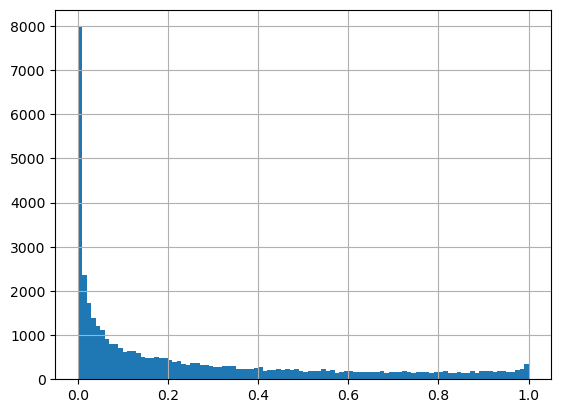

In [27]:
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))

plt.show()

In [29]:
# Read in the sms dataset
spotify_mysterious_sample = pd.read_csv('spotify_mysterious_sample.csv')

# Display the first few rows
spotify_mysterious_sample.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.972,['David Bauer'],0.567,313293.0,5.221550,0.22700,0.0,0w0D8H1ubRerCXHWYJkinO,0.60100,10.0,0.1100,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.988,"['The Cathedral Singers', 'Lorelei McDermott',...",0.233,248600.0,4.143333,0.12200,0.0,4IyK8htJJzbRjPihpMouWu,0.00354,10.0,0.0916,-19.528,1.0,"Ave Maria, Op. 52 No. 6, D. 839 (Arr. for Sopr...",52.0,2000-01-01,0.0333,90.593,0.0991,2000.0
2,0.958,"['Cliff Edwards', 'Disney Studio Chorus']",0.181,195120.0,3.252000,0.27000,0.0,0JIPxQiFYgnPfQDuAZTnHk,0.02030,9.0,0.3520,-13.616,1.0,"When You Wish Upon a Star - From ""Pinocchio""/S...",44.0,2001-01-01,0.0353,92.843,0.1140,2001.0
3,0.971,['John Williams'],0.153,226333.0,3.772217,0.00905,0.0,0pyKuk3bYFSzPIysym8ioN,0.60700,0.0,0.1070,-30.099,1.0,Hogwarts Forever! and the Moving Stairs,48.0,2001-10-30,0.0372,164.191,0.0730,2001.0
4,0.990,['Yiruma'],0.282,277133.0,4.618883,0.15200,0.0,5DLA620cB8o3YIXujemlay,0.90500,2.0,0.0676,-20.094,1.0,Passing By,49.0,2001-11-27,0.0349,84.109,0.0510,2001.0


In [31]:
spotify_mysterious_sample.shape

(1107, 20)

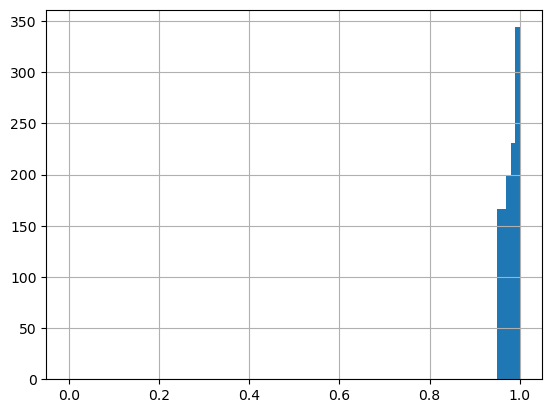

In [33]:
# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

Compare the two histograms you drew. Are the acousticness values in the sample generalizable to the general population?

The acousticness values in the sample are all greater than `0.95`, whereas they range from `0` to `1` in the whole population.

## Are these findings generalizable?
Let's look at another sample to see if it is representative of the population. This time, you'll look at the `duration_minutes` column of the Spotify dataset, which contains the length of the song in minutes.

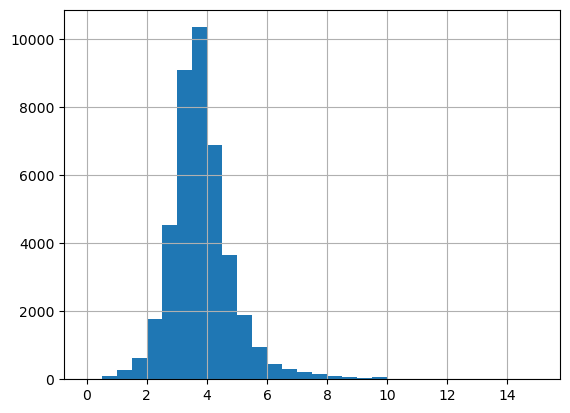

In [38]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5 ))
plt.show()

In [108]:
# Read in the sms2 dataset
spotify_mysterious_sample2 = pd.read_csv('spotify_mysterious_sample2.csv')

# Display the dataset
spotify_mysterious_sample2.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.000402,"['Lil Wayne', 'Drake']",0.364,305840.0,5.097333,0.841,1.0,5eEj1vkMIqtmvaTk7cS4UC,0.000000,8.0,0.2420,-4.831,1.0,She Will,51.0,2011-01-01,0.1190,100.140,0.0837,2011.0
1,0.310000,['blackbear'],0.758,180000.0,3.000000,0.427,1.0,0Cyui3k9S61bue3uMkBD9S,0.000000,10.0,0.1150,-9.835,0.0,Girls Like U,56.0,2016-06-17,0.1130,139.911,0.4890,2016.0
2,0.000984,['Lacuna Coil'],0.503,245573.0,4.092883,0.667,0.0,71KtwiEpzcn9WxwlaS7ZJY,0.027000,11.0,0.2290,-6.831,0.0,Enjoy the Silence - cover version,55.0,2006,0.0285,113.018,0.1010,2006.0
3,0.334000,['The Beach Boys'],0.414,215827.0,3.597117,0.424,0.0,7tf64lNC31lWlTsih0nfZf,0.000005,10.0,0.1310,-9.497,1.0,Good Vibrations,46.0,2012-01-01,0.0399,132.430,0.3250,2012.0
4,0.001700,['In This Moment'],0.426,197627.0,3.293783,0.975,0.0,4Mpm64J9yqluKaOssgVQ9P,0.000000,0.0,0.0891,-1.892,1.0,Call Me,50.0,2009-04-10,0.0950,142.998,0.2730,2009.0


In [110]:
spotify_mysterious_sample2.shape

(50, 20)

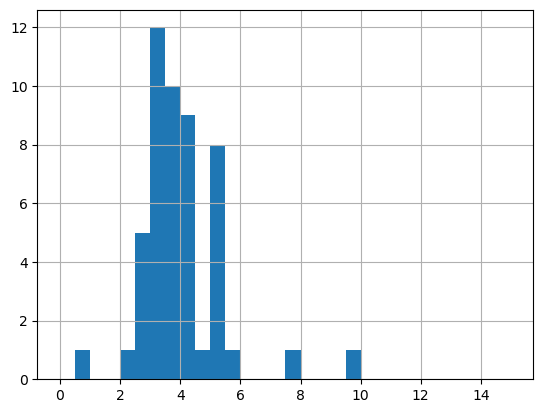

In [112]:
# Update the histogram to use spotify_mysterious_sample2
spotify_mysterious_sample2['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

Compare the two histograms you drew. Are the duration values in the sample generalizable to the general population?

Yes. The sample selected is likely a random sample of all songs in the population.

The duration values in the sample show a similar distribution to those in the whole population, so the results are generalizable.

## Generating random numbers
You've used `.sample()` to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the `normal distribution`.

Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate.

In [53]:
# Generate 5000 random numbers from a uniform distribution ranging from -3 to 3
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Print the array of generated uniform random numbers
print(uniforms)

[-1.5270848   0.09554723 -2.28365095 ... -2.74659023 -2.5762355
  0.52192827]


In [55]:
len(uniforms)

5000

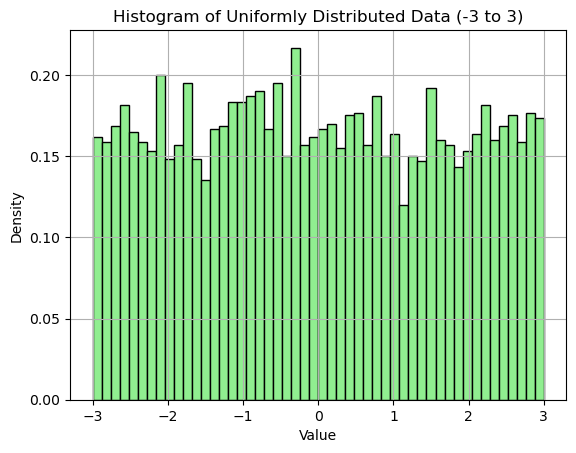

In [64]:
# Plot a histogram to visualize the distribution
plt.hist(uniforms, bins=50, color='lightgreen', edgecolor='black', density=True)
plt.title('Histogram of Uniformly Distributed Data (-3 to 3)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [57]:
# Generate 5000 random numbers from a normal (Gaussian) distribution
# The distribution has a mean (loc) of 5 and a standard deviation (scale) of 2
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print the array of generated normal random numbers
print(normals)

[ 5.96049093  7.85584577  4.95063991 ... -2.13472266  4.97810824
  5.87615283]


In [59]:
len(normals)

5000

Most of your values will cluster around 5, with fewer values further away, but still within a range of about

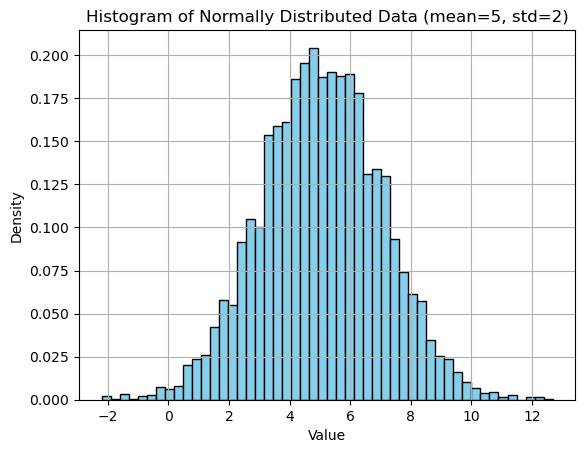

In [62]:
plt.hist(normals, bins=50, color='skyblue', edgecolor='black', density=True)
plt.title('Histogram of Normally Distributed Data (mean=5, std=2)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

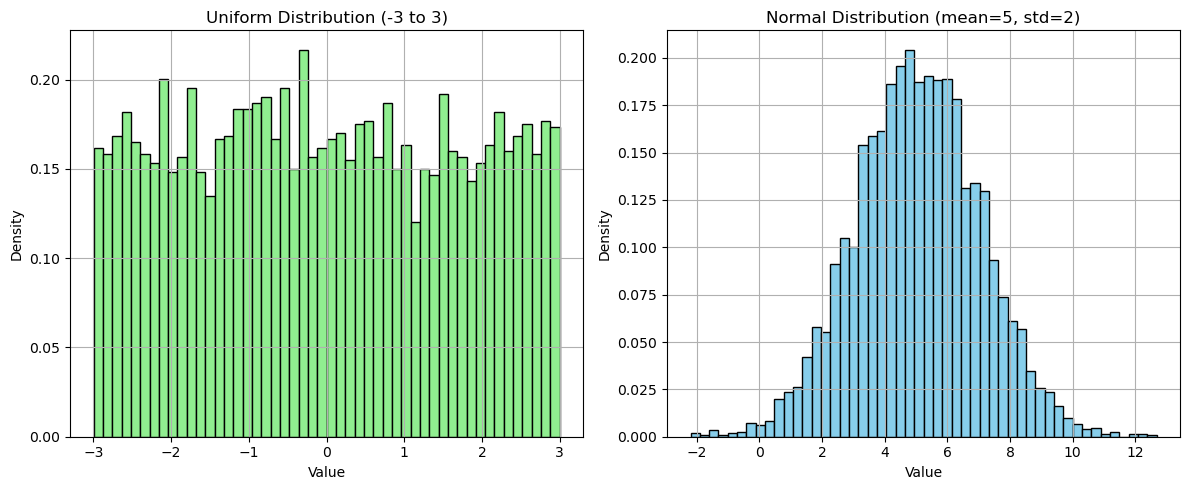

In [66]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the uniform distribution
axes[0].hist(uniforms, bins=50, color='lightgreen', edgecolor='black', density=True)
axes[0].set_title('Uniform Distribution (-3 to 3)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].grid(True)

# Plot the normal distribution
axes[1].hist(normals, bins=50, color='skyblue', edgecolor='black', density=True)
axes[1].set_title('Normal Distribution (mean=5, std=2)')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

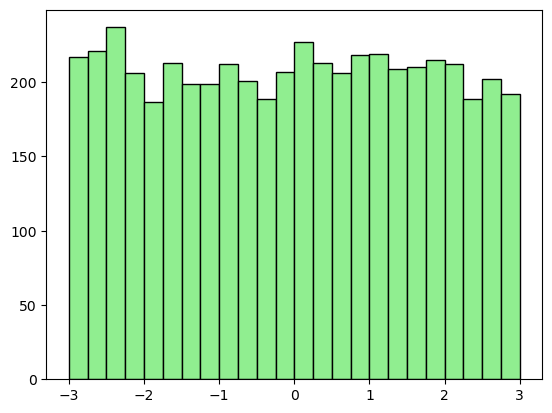

In [72]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
# Define bin edges from -3 to 3.25 with a bin width of 0.25
# first edge = -3.0
# second edge = -3.0+0.25 = -2.75
# 3rd edge = -2.75+0.25 = -2.50 and so on
# The first bar corresponds to the range between -3.0 and -2.75.
# The second bar corresponds to the range between -2.75 and -2.5, and so on.
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25), color='lightgreen', edgecolor='black')
plt.show()

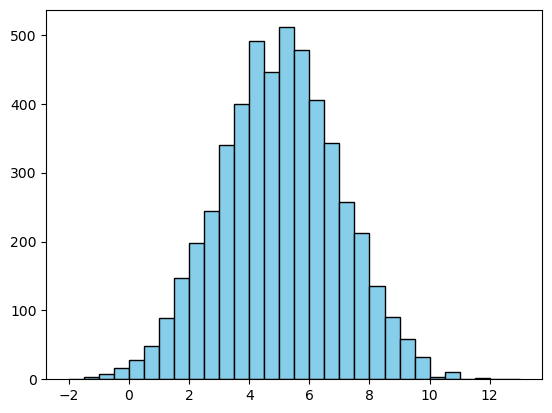

In [74]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, np.arange(-2, 13.5, 0.5), color='skyblue', edgecolor='black')
plt.show()

Notice how the histograms almost take the flat and bell curve shapes of the uniform and normal distributions, but there is a bit of random noise.

## Understanding random seeds
While random numbers are important for many analyses, they create a problem: the results you get can vary slightly. This can cause awkward conversations with your boss when your script for calculating the sales forecast gives different answers each time.

Setting the seed for `numpy's` random number generator helps avoid such problems by making the random number generation reproducible.

In [104]:
# In the first case, the seed is set once, and the generator progresses through its state for both x and y independently.
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)

In [106]:
print(x)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


In [108]:
print(y)

[ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]


In [112]:
# In the second case, the seed is reset to the same value before generating y, 
# so both x and y are drawn from the same sequence of random numbers.
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)

In [114]:
print(x)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


In [116]:
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


In [126]:
# The random numbers in x and y are different because the seed 
# for the random number generator was changed between generating x and y.
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)

In [128]:
print(x)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


In [130]:
print(y)

[-0.6681285  -0.49820952  0.61857582  0.56869225  1.35050948]


## Simple random sampling
The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.

In [139]:
# import the attrition data
attrition_pop = pd.read_feather('attrition.feather')

# Display the first few row
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [187]:
attrition_pop.shape

(1470, 31)

In [147]:
# Sample 70 rows using simple random sampling and set the seed
# random_state=18900217: ensures it will produce the same results every time the code is run with this seed and dataset.
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
attrition_samp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3


Notice how the indexes in the sample aren't always in increasing order. They are just random.

## Systematic sampling
One sampling method that avoids randomness is called ***systematic sampling***. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows `0`, `200`, `400`, `600`, and `800`.

In [154]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Print pop_size
print(pop_size)

1470


In [156]:
# Calculate the interval
interval = pop_size // sample_size

# Print interval
print(interval)

21


In [162]:
# Systematically sample 70 rows
# Systematically sample every 'interval'-th row from the population
# This gives you approximately 70 evenly spaced rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
attrition_sys_samp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0


It selects rows at regular intervals (e.g., every 21st row if interval = 21).

This is a simple and efficient way to get a roughly evenly distributed sample from a sorted or randomized population.

Unlike random sampling, it's not truly random unless you first shuffle the data.

## Is systematic sampling OK?
Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.

Here you'll look at how to determine whether or not there is a problem.

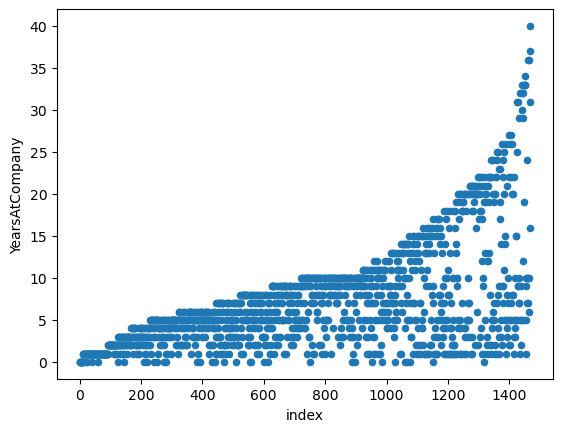

In [176]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

In [178]:
attrition_pop_id.head()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,...,Excellent,High,0,0,2,Better,0,0,0,0
3,3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


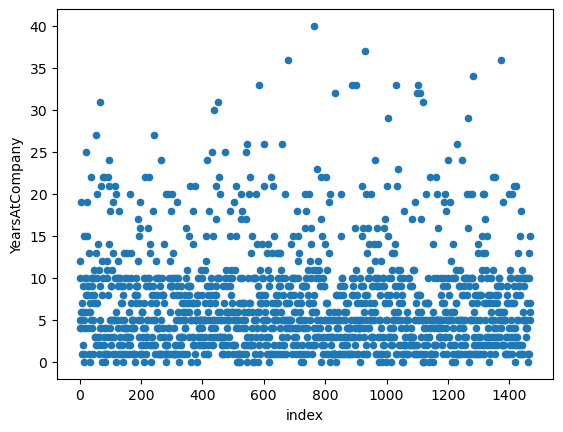

In [180]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

In [182]:
attrition_shuffled.head()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,46,0.0,Travel_Rarely,1485,Research_Development,18,Bachelor,Medical,High,...,Excellent,High,1,19,5,Good,10,7,0,8
1,1,44,0.0,Travel_Rarely,1448,Sales,28,Bachelor,Medical,Very_High,...,Excellent,High,1,23,2,Better,12,11,11,11
2,2,24,0.0,Travel_Rarely,477,Research_Development,24,Bachelor,Medical,Very_High,...,Outstanding,Very_High,0,6,2,Better,4,3,1,2
3,3,28,0.0,Non-Travel,1103,Research_Development,16,Bachelor,Medical,High,...,Excellent,High,0,5,3,Good,5,3,1,4
4,4,34,0.0,Travel_Rarely,304,Sales,2,Bachelor,Other,Very_High,...,Outstanding,High,0,6,5,Better,6,5,1,4


In [185]:
attrition_shuffled.shape

(1470, 32)

Systematic sampling has problems when the data are sorted or contain a pattern. Shuffling the rows makes it equivalent to simple random sampling.

## Proportional stratified sampling
If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. ***Proportional stratified*** sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

**What it does**:
* Takes 40% of each group (based on the 'Education' column).
* If one group has 100 people, you'll get 40 from that group.
* If another has 50 people, you'll get 20.

**Sample size per group**:
Proportional to group size.

✅**Best for**:
* Keeping the same proportions as the population.
* Making your sample represent the real-world distribution of groups.

In [241]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64


In [251]:
# Proportional stratified sampling for 40% of each Education group
# attrition_pop.groupby('Education', observed=False)
# → This splits the dataset (attrition_pop) into separate groups based on the 'Education' column.
# .sample(frac=0.4, random_state=2022)
# → From each group, it randomly selects 40% of the rows.
# The random_state=2022 ensures you get the same sample every time you run it.
attrition_strat = attrition_pop.groupby('Education', observed=False).sample(frac=0.4, random_state=2022)


# Print the sample
attrition_strat.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4


In [253]:
attrition_strat.shape

(588, 31)

In [255]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Education
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: proportion, dtype: float64


> By grouping then sampling, the size of each group in the sample is representative of the size of the sample in the population.

## Equal counts stratified sampling
If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

**What it does**:
* Takes exactly 30 people from each group, regardless of how big the group is.
* Even if one group has 300 and another has only 40, both will contribute 30.

**Sample size per group**:
Same for all groups (e.g., 30 each).

**✅Best for**:
* Comparing groups equally.
* Avoiding dominance of large groups in analysis.

In [259]:
# Get 30 employees from each Education group
# A balanced sample: 30 employees from each education level.
# Total sample size = 30 × number of education groups.
# Useful when comparing groups equally — even if some groups are small in the full dataset.
attrition_eq = attrition_pop.groupby('Education', observed=False).sample(n=30, random_state=2022)


# Print the sample
attrition_eq.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4


In [261]:
# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64


> If you want each subgroup to have equal weight in your analysis, then equal counts stratified sampling is the appropriate technique.